## 멀티 모달 : 이미지 분석하기

In [1]:
from dotenv import load_dotenv
import os

# .env 파일의 내용 불러오기
load_dotenv("C:/env/.env")

# 환경 변수 가져오기
API_KEY = os.getenv("OPENAI_API_KEY")
# print(API_KEY)

from openai import OpenAI
client = OpenAI(api_key=API_KEY)

### [1] 이미지 입력하기

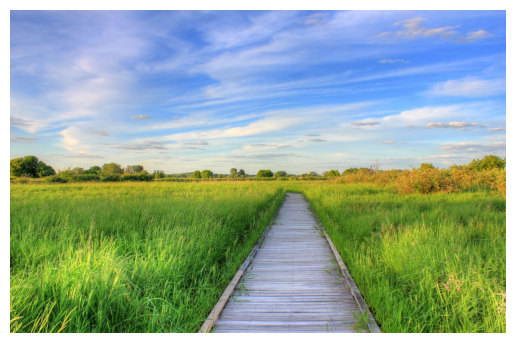

In [51]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# 이미지 URL
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# URL에서 이미지 가져오기
response = requests.get(url)  # REST API :'GET'
# print(response.content)
img = Image.open(BytesIO(response.content))
# print(img)

# 이미지 출력
plt.imshow(img)
plt.axis('off')  # x,y축 제거
plt.show()

In [5]:
# 이미지 입력 질의
response = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages = [
    {   
        "role" : "user",
        "content" : [ 
            {   "type" : "text","text":"이 이미지에는 무엇이 있나요?" },
            {
                "type": "image_url",
                "image_url" : {
                    "url" : url     # 이미지 URL 주소
                },
            },
        ],
    }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

이 이미지에는 넓은 초원과 그 위에 놓인 나무 다리가 보입니다. 푸른 하늘과 흩어진 구름이 있는 자연 풍경이 특징입니다. 초원에는 높은 풀과 작은 나무들이 있어 평화롭고 조용한 분위기를 자아냅니다.


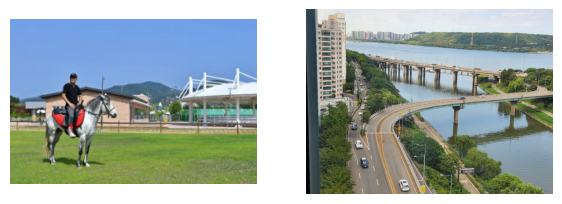

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

# 로컬 경로에 있는 이미지를 불러옵니다.
image_path1 = 'horse.jpg'
image_path2 = 'river.jpg'

# 이미지를 열어줍니다.
img1 = Image.open(image_path1)
img2 = Image.open(image_path2)


# 이미지를 출력합니다.
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
axes[0].imshow(img1)
axes[0].axis('off')  # 축 제거
axes[1].imshow(img2)
axes[1].axis('off')  # 축 제거
plt.show()

In [6]:
# Image to Base64 Encoding
import base64

# Function to encode the image
# Online tool:  https://www.base64encode.net/base64-image-encoder
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# image_path = "horse.jpg"  
image_path = "river.jpg"  

base64_image = encode_image(image_path)
# print(base64_image)

In [73]:
response = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages = [
    {   
        "role" : "user",
        "content" : [ 
            {   "type" : "text","text":"이 이미지에는 무엇이 있나요?" },
            {
                "type": "image_url",
                "image_url" : {
                    "url" : f"data:image/jpeg;base64,{base64_image}"   # base64 인코딩 이미지 데이터
                },
            },
        ],
    }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

이미지에는 강가의 풍경이 담겨 있습니다. 도로와 차도, 그리고 다리가 보이며, 강을 따라 나무와 녹지가 많습니다. 먼 거리에는 건물들이 보이고, 하늘은 맑아 보입니다. 전반적으로 도시와 자연이 조화를 이루는 모습입니다.


## [2] 이미지 세밀한 분석

In [92]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# image_path = "horse.jpg"  
image_path = "river.jpg"  

base64_image = encode_image(image_path)

response = client.chat.completions.create(
    #model = "gpt-4o-mini", #  여러대
    model = "gpt-4o",       #  10~25 범위로 답변   
    messages = [
    {   
        "role" : "user",
        "content" : [ 
            {   "type" : "text","text":"이 이미지에는 자동차가 몇대 있나요?" },
            {
                "type": "image_url",
                "image_url" : {
                    "url" : f"data:image/jpeg;base64,{base64_image}"   # base64 인코딩 이미지 데이터
                },
            },
        ],
    }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

이미지에는 총 15대의 자동차가 보입니다.


## [3] 여러개의 이미지 사용하기

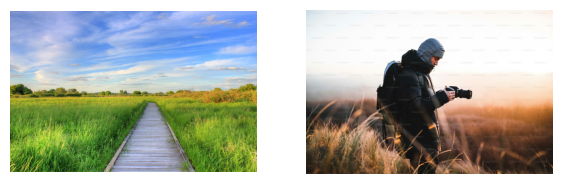

In [95]:
# 두 개의 이미지 URL을 지정합니다.
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg'
url2 = 'https://plus.unsplash.com/premium_photo-1673448391005-d65e815bd026?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'

# 이미지를 불러오는 함수
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# 이미지를 불러옵니다.
img1 = load_image(url1)
img2 = load_image(url2)

# 이미지를 출력합니다.
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
axes[0].imshow(img1)
axes[0].axis('off')  # 축 제거
axes[1].imshow(img2)
axes[1].axis('off')  # 축 제거
plt.show()

In [97]:
# 다른 이미지 사용시
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "이 이미지들에는 무엇이 있나요? 이들 사이에 차이가 있나요?",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://plus.unsplash.com/premium_photo-1673448391005-d65e815bd026?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

첫 번째 이미지는 넓은 초원과 나무들, 그리고 하늘이 아름답게 펼쳐진 자연 풍경을 보여줍니다. 나무로 된 길이 초원의 중앙을 가로지르고 있어, 평화롭고 조용한 느낌을 줍니다.

두 번째 이미지는 사진작가가 카메라로 촬영하는 모습입니다. 그 주위에는 풀과 자연 풍경이 보이며, 색감은 따뜻하고 부드럽습니다. 외투를 입고 모자를 쓴 모습에서 추운 날씨임을 암시합니다.

두 이미지의 차이는 주로 주제와 분위기입니다. 첫 번째 이미지는 경치 그 자체에 포커스를 맞추고 있으며, 두 번째 이미지는 그 경치를 촬영하는 사람의 모습을 담고 있습니다.


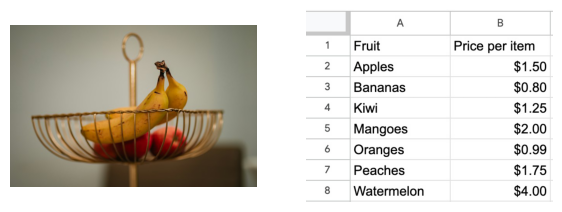

In [99]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# 두 개의 이미지 URL을 지정합니다.
url1 = 'https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/banana-apple.jpg'
url2 = 'https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/pricelist.jpg'

# 이미지를 불러오는 함수
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# 이미지를 불러옵니다.
img1 = load_image(url1)
img2 = load_image(url2)

# 이미지를 출력합니다.
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
axes[0].imshow(img1)
axes[0].axis('off')  # 축 제거
axes[1].imshow(img2)
axes[1].axis('off')  # 축 제거
plt.show()

In [103]:
# 두 개의 이미지 입력

response = client.chat.completions.create(
  # model="gpt-4o-mini",
  model="gpt-4o",    
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "이 이미지들에는 무엇이 있는지 자세히 설명해주세요",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/banana-apple.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/pricelist.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

첫 번째 이미지에는 금속 와이어로 된 과일 바구니가 있습니다. 바구니 안에는 바나나 여러 개와 빨간색 과일(사과로 보임)이 들어 있습니다.

두 번째 이미지는 과일과 그 가격을 표로 정리한 것입니다. 표의 내용은 다음과 같습니다:

- Apples: $1.50
- Bananas: $0.80
- Kiwi: $1.25
- Mangoes: $2.00
- Oranges: $0.99
- Peaches: $1.75
- Watermelon: $4.00


In [107]:
# 두 개의 이미지 입력

response = client.chat.completions.create(
  # model="gpt-4o-mini",
  model="gpt-4o",    
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "첫 번째 이미지에 있는 과일의 갯수와 과일들의 총 가격을 알려주세요",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/banana-apple.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/pricelist.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

첫 번째 이미지에는 바나나 두 개와 사과 두 개가 있습니다.

가격을 계산해보면:
- 바나나 2개: 2 x $0.80 = $1.60
- 사과 2개: 2 x $1.50 = $3.00

총 가격은 $1.60 + $3.00 = $4.60입니다.


In [123]:
# 두 개의 이미지로 정보 알아오기
prompt = """
이 단계들을 통해 질문에 답하세요:
1단계: 첫 번째 이미지에 어떤 종류의 과일들이 있는지 확인하세요. 
2단계: 각 과일의 수량을 세세요. 
3단계: 첫 번째 이미지에 있는 각 과일에 대해 가격표에서 가격을 확인하세요. 
4단계: 각 과일의 소계 가격을 계산하세요. 
5단계: 소계 가격들을 사용하여 과일들의 총 가격을 계산하세요.

각 단계에서 취한 조치를 설명하고 답변하세요.
"""
response = client.chat.completions.create(
  # model="gpt-4o-mini",     # 답이 정확하지 않음 
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/banana-apple.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/pricelist.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=500,
)

print(response.choices[0].message.content) 

1단계: 첫 번째 이미지에서 바나나와 사과가 보입니다.

2단계: 바나나 3개, 사과 2개가 있습니다.

3단계: 가격표에서 해당 과일의 가격을 확인합니다.
- 바나나: $0.80
- 사과: $1.50

4단계: 각각의 소계 가격을 계산합니다.
- 바나나: 3개 × $0.80 = $2.40
- 사과: 2개 × $1.50 = $3.00

5단계: 소계 가격들의 합을 계산합니다.
- 총 가격 = $2.40 + $3.00 = $5.40

따라서 과일의 총 가격은 $5.40입니다.


### [4] 이미지와 인터페이스 이해하기

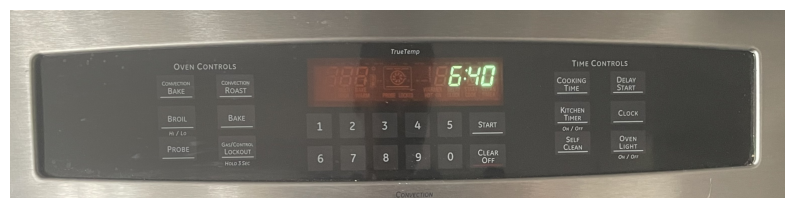

In [126]:
# 이미지 URL
url = "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/stove.jpg"

# URL에서 이미지 가져오기
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

In [128]:
prompt = """
이 기기의 시계를 어떻게 리셋할 수 있나요?
한국어로 먼저 설명서를 제공하고 뒤에 영어로 사용 설명서를 제공하세요.
사용 설명서에 버튼이 포함된 경우, 해당 버튼들이 물리적으로 어디에 위치해 있는지도 설명해 주세요.
"""

response = client.chat.completions.create(
  # model="gpt-4o-mini",     # 답이 정확하지 않음 
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/stove.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=500,
)

print(response.choices[0].message.content)  

### 한국어 설명서

1. **시계 버튼 찾기**: 오른쪽 패널에 있는 "Clock" 버튼을 찾으세요.

2. **시계 버튼 누르기**: "Clock" 버튼을 한 번 누르세요. 숫자가 깜빡이기 시작할 것입니다.

3. **시간 설정**: 중앙에 있는 숫자 키패드를 사용하여 현재 시간을 입력하세요. 예를 들어, 6시 30분이라면 "6", "3", "0"을 순서대로 누르세요.

4. **완료**: 시간을 입력한 후, 다시 "Clock" 버튼을 눌러 설정을 저장하세요.

### 버튼 위치:
- "Clock" 버튼은 기기 오른쪽 패널 중간에 위치합니다.
- 숫자 키패드는 중앙에 위치합니다 (1부터 9까지의 숫자로 구성).

---

### English Manual

1. **Find the Clock Button**: Locate the "Clock" button on the right panel.

2. **Press the Clock Button**: Press the "Clock" button once. The numbers should begin to blink.

3. **Set the Time**: Use the number keypad in the center to enter the current time. For example, if it's 6:30, press "6", "3", "0" in sequence.

4. **Finish**: After entering the time, press the "Clock" button again to save the setting.

### Button Location:
- The "Clock" button is located in the middle of the right panel.
- The number keypad is located in the center (consisting of numbers 1 to 9).


### [5] 입력 이미지의 유사점과 차이점 분석하기

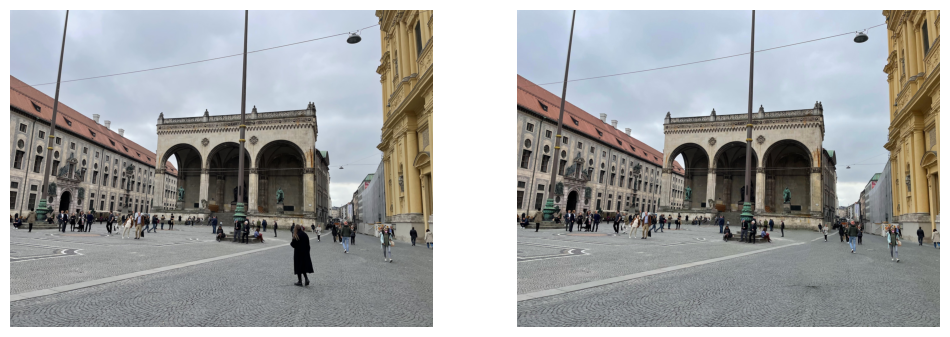

In [131]:
# 두 개의 이미지 URL을 지정합니다.
url1 = "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/landmark1.jpg"
url2 = "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/landmark2.jpg"

# 이미지를 불러오는 함수
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# 이미지를 불러옵니다.
img1 = load_image(url1)
img2 = load_image(url2)

# 이미지를 출력합니다.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(img1)
axes[0].axis('off')  # 축 제거
axes[1].imshow(img2)
axes[1].axis('off')  # 축 제거
plt.show()

In [137]:
prompt = """
두 개의 이미지에 대하여 다음 내용을 답하세요:
1. 첫번째 이미지에는 무엇이 보이나요?
2. 두 이미지 사이에 어떤 유사점이 있나요?
3. 첫번째 이미지와 두번째 이미지의 내용 또는 사람의 수에서 어떤 차이가 있나요?

"""
response = client.chat.completions.create(
  # model="gpt-4o-mini",     
  model="gpt-4o",
  temperature=0.0,
  top_p=0.8,    
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": url1
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": url2
          },
        },
      ],
    }
  ],
  max_tokens=500,
)

print(response.choices[0].message.content)  

1. 첫번째 이미지에는 사람들이 있는 넓은 광장과 고풍스러운 건축물이 보입니다.

2. 두 이미지 모두 같은 장소를 보여주고 있으며, 건물과 사람들의 배치가 유사합니다.

3. 첫번째 이미지와 두번째 이미지의 사람 수나 배치에는 큰 차이가 없습니다. 두 이미지 모두 거의 동일한 장면을 담고 있습니다.


## [6] Video 분석하기
: https://cookbook.openai.com/examples/gpt_with_vision_for_video_understanding

In [46]:
# !pip install opencv-python

from IPython.display import display, Image, Audio
import cv2
import base64
import requests
import numpy as np
import time

# Step 1: Download the video file from the URL
video_url = "https://storage.googleapis.com/github-repo/img/gemini/multimodality_usecases_overview/photography.mp4"
response = requests.get(video_url, stream=True)

# Save the video locally
with open("downloaded_video.mp4", 'wb') as video_file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            video_file.write(chunk)

# Step 2: Use OpenCV to process the downloaded video
video = cv2.VideoCapture("downloaded_video.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

538 frames read.


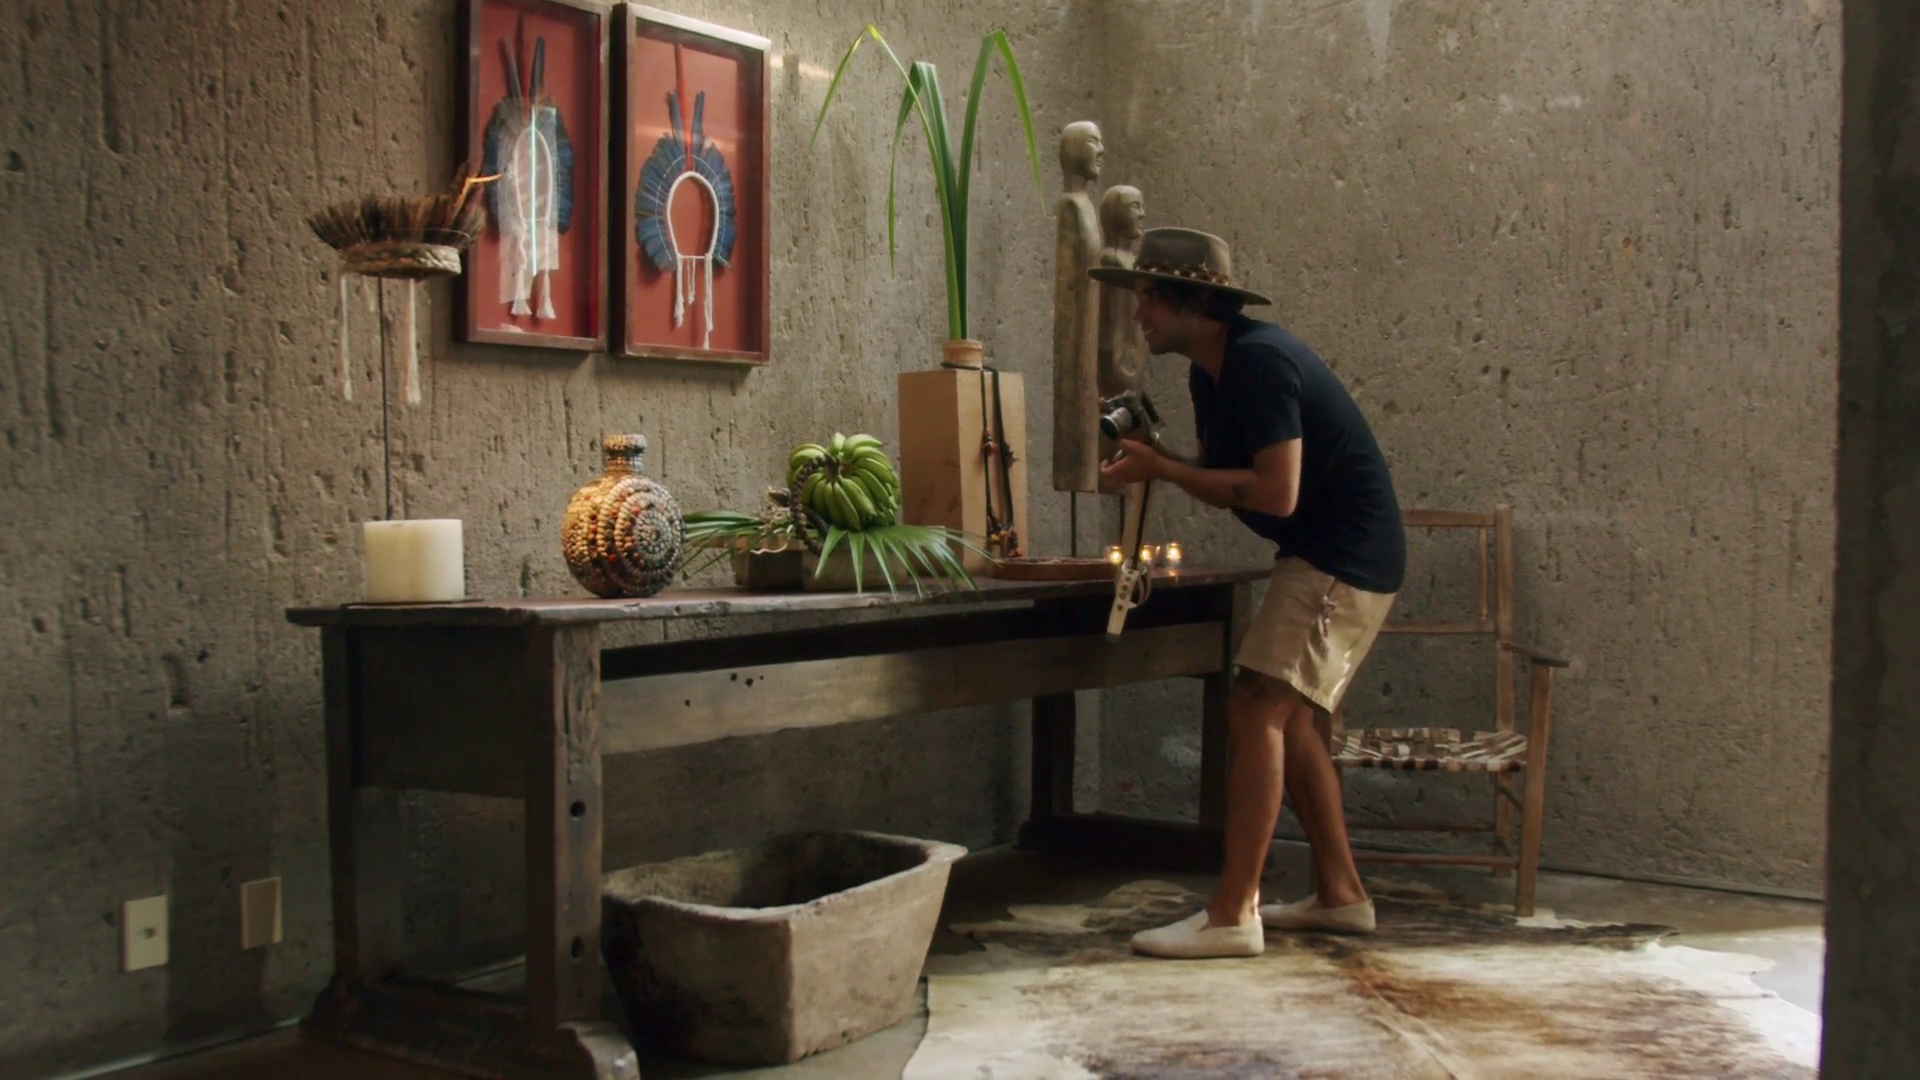

In [48]:
display_handle = display(None, display_id=True)
for img in base64Frames: # 538회 반복
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [22]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "이것은 제가 업로드하고자 하는 영상의 프레임들입니다. 영상을 함께 업로드할 때 사용할 수 있는 설명을 작성해 주세요.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

이 영상은 고요한 분위기의 공간에서 촬영된 장면을 담고 있습니다. 벽에는 예술 작품들이 장식되어 있고, 원목 테이블 위에는 식물과 장식품들이 놓여져 있어 자연스럽고 예술적인 분위기를 자아냅니다. 카메라를 든 사람이 이 공간의 세부적인 모습을 사진으로 담고 있으며, 그의 움직임과 집중력이 이 공간의 차분한 매력을 한층 더해 줍니다. 시청자들은 이 영상을 통해 조용하고 깊이 있는 공간의 아름다움을 느낄 수 있습니다.


In [24]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "이것은 제가 업로드하고자 하는 영상의 프레임들입니다. 영상에 나오는 물체들을 모두 알려주세요",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

이 영상 프레임에 나오는 물체들은 다음과 같습니다:

1. 두 개의 액자 그림
2. 깃털 장식물
3. 흰색 촛불
4. 구슬로 장식된 병 모양의 장식품
5. 초록색 열매와 나뭇잎
6. 두 개의 나무 조각들
7. 여러 개의 작은 초
8. 나무 테이블
9. 의자
10. 카펫
11. 큰 화분이나 용기
12. 카메라를 들고 있는 사람

이들이 화면에 보이는 물체들입니다.


## [7] Text-to-speech (TTS)
: https://openai.com/index/new-models-and-developer-products-announced-at-devday/

In [27]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::60]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In a quiet corner, surrounded by walls of stone, an observer captures the beauty of artistic relics with focused intent. These treasures, adorned in vibrant hues and intricate patterns, hold stories of cultures long past. Here, among the flickering candles, each frame taken by the photographer becomes a gateway to history, preserving these moments for future generations. This is not just the art of observation—it is the art of connection with our shared human heritage.


In [88]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ.get('OPENAI_API_KEY')}",
    },
    json={
        #"model": "tts-1-1106",
        "model": "tts-1-hd",
        "input": result.choices[0].message.content,
        "voice": "alloy",   # Alloy :소문자로 
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

In [92]:
import os
import requests
from IPython.display import display, Audio

# OpenAI API 요청
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ.get('OPENAI_API_KEY')}",
    },
    json={
        "model": "tts-1-hd",
        "input": "Hello, this is a test speech.",
        "voice": "alloy",
    },
)

# 응답 확인
if response.status_code != 200:
    print("Error:", response.status_code, response.text)
else:
    audio = response.content
    display(Audio(audio))


## [8] DALL·E 3

In [38]:
# 구버전 : 오류남!!
import openai

# OpenAI API 키 설정
openai.api_key = API_KEY

def generate_image(prompt, size="1024x1024"):
    try:
        response = openai.Image.create(
            prompt=prompt,
            n=1,
            size=size
        )
        image_url = response['data'][0]['url']
        return image_url
    except Exception as e:
        print(f"Error generating image: {e}")
        return None

if __name__ == "__main__":
    # 프롬프트와 이미지 사이즈 설정
    prompt = "A futuristic cityscape with towering skyscrapers, flying cars, and neon lights"
    size = "1024x1024"
    
    # 이미지 생성
    image_url = generate_image(prompt, size)
    
    if image_url:
        print(f"Image generated successfully: {image_url}")
    else:
        print("Failed to generate image.")


Error generating image: 

You tried to access openai.Image, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Failed to generate image.


In [40]:
# from openai import OpenAI
# client = OpenAI()

response = client.images.generate(
  model="dall-e-3",
  prompt="하얀 고양이와 바둑이",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [42]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-hpVTWpBrDBZh2br68EWRzo34/user-haUWct9v8SqmpmSVertS4VTf/img-GZmEeCA2xqd3z39k8Yu9i9YR.png?st=2025-02-13T03%3A33%3A12Z&se=2025-02-13T05%3A33%3A12Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-02-12T20%3A15%3A14Z&ske=2025-02-13T20%3A15%3A14Z&sks=b&skv=2024-08-04&sig=/bVHBrlC6McyGOc/GefAVv9HeQ9hZN39sUyLLSXv7r0%3D'

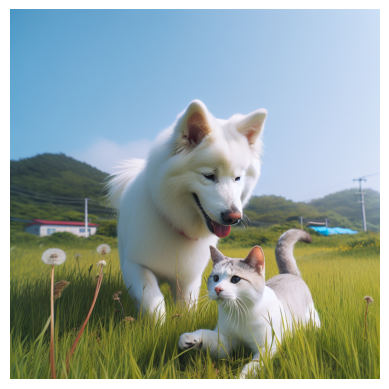

In [53]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# URL에서 이미지 가져오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# 이미지 출력
plt.imshow(img)
plt.axis('off')  
plt.show()

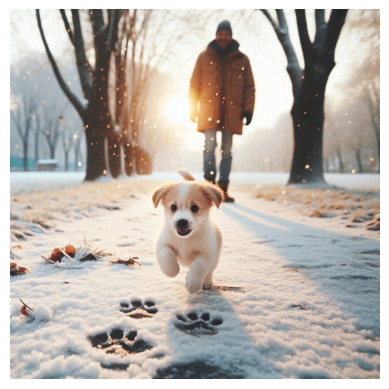

In [58]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

prompt = "눈오는 날 공원에서 주인과 산책하는 어린 강아지 사진 만들어줘"

response = client.images.generate(
  model="dall-e-3",
  prompt=prompt,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

# URL에서 이미지 가져오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# 이미지 출력
plt.imshow(img)
plt.axis('off')  
plt.show()